In [1]:
#ini-iPython

# Executando no diretório principal

In [2]:
import os
os.chdir("/home/vinicius/Dropbox/Projeto Mestrado/Codigos/RoboFEI-HT_Debug/AI/Visual_Memory") #Executando na pasta Visual_Memory
import sys
sys.path.append("./include")
sys.path.append("./src")
sys.path.append("./iPython")
#end-iPython

---- Imports ----

In [3]:
# Libraries to be used.
import sys
#des-iPython sys.path.append("../include")
#des-iPython sys.path.append("../src")

In [4]:
# The standard libraries used in the visual memory system.


In [5]:
# Used class developed by RoboFEI-HT.
#ini-iPython - Usando Classe KalmanFilter como instanciação 
os.system("sed -i 's/_//g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/init/__init__/g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/@abstractmethod//g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/conf/_conf/g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/invquick/inv_quick/g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/linearacceleration/linear_acceleration/g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/visionerror/vision_error/g' ./iPython/KalmanFilter.py")
os.system("sed -i 's/xspeed/x_speed/g' ./iPython/KalmanFilter.py")

#end-iPython
from KalmanFilter import * # Class responsible for implementing kalman filter methods.
sym.init_printing() #debug-iPython

# Class to Landmark
Class responsible for performing landmarks tracking.
doxygen-iPython

In [6]:
#des-iPython class Landmark(KalmanFilter):
#ini-tab -> Iniciando código classe

---- Variables ----

In [7]:
#ini-iPython

# ------- Lista de funções herdadas -------

#self-iPython _t

#self-iPython _A
#self-iPython _B
#self-iPython _R

#self-iPython _px
#self-iPython _py
#self-iPython _vx
#self-iPython _vy
#self-iPython _ax
#self-iPython _ay

# ------- Lista variaveis herdadas -------

#self-iPython _parameters
#self-iPython _conf
#self-iPython _speeds

# Estados
#self-iPython _state
#self-iPython _predictedstate


# ------- Lista de funções -------

#self-iPython update
#self-iPython reset
#self-iPython predict

#end-iPython - Fim listas

# reset
.
doxygen-iPython

In [8]:
#eself-iPython reset
#edes-iPython def reset(self):
def reset( ):
    #edes-iPython super(Landmark, self)._reset( )
    kalman.reset( )
    
    #edes-iPython _B = sym.Matrix([
    kalman.B = sym.Matrix([
        #edes-iPython [0, 0, 0, 0, _px],
        [0, 0, 0, 0, kalman.px],
        #edes-iPython [0, 0, 0, 0, _py],
        [0, 0, 0, 0, kalman.py],
        #edes-iPython [0, 0, 0, 0, _vx],
        [0, 0, 0, 0, kalman.vx],
        #edes-iPython [0, 0, 0, 0, _vy],
        [0, 0, 0, 0, kalman.vy],
        #edes-iPython [0, 0, 0, 0, _ax],
        [0, 0, 0, 0, kalman.ax],
        #edes-iPython [0, 0, 0, 0, _ay],
        [0, 0, 0, 0, kalman.ay],
    ])
    
    #edes-iPython _R = sym.zeros(6)  #self-iPython reset
    kalman.R = sym.zeros(6)

In [9]:
#ini-iPython

## Teste reset

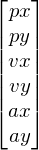

In [10]:
s = Speeds( ) #debug-iPython
kalman = KalmanFilter(s, "Landmarks")
reset( )
kalman.B*sym.Matrix([
    [2.3],
    [1.9],
    [7.8],
    [1.5],
    [1],
])

In [11]:
del kalman
del s
#end-iPython

# Constructor Class
doxygen-iPython

In [12]:
s = Speeds( ) #debug-iPython
#des-iPython def __init__(self, s):
#ini-tab -> Criando construtor
# Instantiating constructor for inherited class.
#edes-iPython super(Landmark, self).__init__(s, "Landmarks")
kalman = KalmanFilter(s, "Landmarks")

# Creating characteristic variables for landmarks and reading.
#eself-iPython update
#des-iPython _parameters.update({
#des-iPython     "linear_acceleration": True
#des-iPython }) #self-iPython update
#ini-iPython
kalman.parameters.update({
    "linear_acceleration": True
})
#end-iPython
#edes-iPython _parameters = _conf.readVariables(_parameters)
kalman.parameters = kalman._conf.readVariables(kalman.parameters)

reset( )

In [13]:
#end-tab -> Finalizando construtor

In [14]:
#ini-iPython

## Teste construtor

In [15]:
kalman._end( )
print kalman.parameters

vrx, vry, arx, ary = sym.symbols("vr_x vr_y ar_x ar_y")

__u = sym.Matrix([
    [vrx],
    [vry],
    [arx],
    [ary],
    [1],
])

kalman.B*__u

s[1]
#end-iPython

{'linear_acceleration': True, 'vision_error': 0.1}


{'R': Matrix([
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]), 'x_speed': Matrix([
 [0],
 [0],
 [0],
 [0],
 [1]])}

# update
.
doxygen-iPython

In [46]:
#eself-iPython update
#edes-iPython def update(self, data):
def update(data):
    #edes-iPython _predictedstate["x"][2:, 0] = -_speeds[data["movement"]]["x_speed"][:len(_speeds[data["movement"]]["x_speed"])-1, 0]
    kalman.predictedstate["x"][2:, 0] = -kalman.speeds[data["movement"]]["x_speed"][:len(kalman.speeds[data["movement"]]["x_speed"])-1, 0]
    #edes-iPython _predictedstate["covariance"] = _speeds[data["movement"]]["R"]
    kalman.predictedstate["covariance"] = kalman.speeds[data["movement"]]["R"]
    
    #edes-iPython super(Landmark, self).update(data)
    kalman.update(data)
    
    #edes-iPython return [data["movement"], _predictedstate["x"], _predictedstate["covariance"]]
    return [data["movement"], kalman.predictedstate["x"], kalman.predictedstate["covariance"]] #self-iPython update

In [47]:
#ini-iPython

## Teste update

In [48]:
data = {
    "movement": 1,
    "target": 1,
    "pos": [0, 0],
    "time": 1.0,
}

print update(data)
#end-iPython

[1, Matrix([
[0.0],
[0.0],
[0.0],
[0.0],
[0.0],
[0.0]]), Matrix([
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])]


In [19]:
#end-tab -> Finalizando classe

In [20]:
#ini-iPython

# nova_variavel
.
doxygen-iPython

In [21]:
nova_variavel = None #self-iPython nova_variavel

# nova_funcao
.
doxygen-iPython

In [22]:
# eself-iPython nova_funcao
# edes-iPython def nova_funcao(self, variaveis_funcao):
def nova_funcao(variaveis_funcao):
    pass # self-iPython nova_funcao

In [23]:
#ini-iPython

## Teste nova_funcao

In [24]:

#end-iPython

In [25]:
#end-iPython